In [1]:
import numpy as np
import collections
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

from emukit.core import ParameterSpace, ContinuousParameter

from transfergpbo.benchmarks import hartmann
from transfergpbo import experiment, experiment_1
from transfergpbo import parameters

import warnings
warnings.filterwarnings("ignore")

In [2]:
x_list = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
x = np.array(x_list).reshape(-1,1)
x

array([[1.e-04],
       [1.e-03],
       [1.e-02],
       [1.e-01],
       [1.e+00],
       [1.e+01],
       [1.e+02],
       [1.e+03]])

In [9]:
hartmann.hartmann3d_function(x)

array([[ 0.0681142 ],
       [ 0.06938533],
       [ 0.08315794],
       [ 0.34664797],
       [ 0.30047607],
       [-0.        ],
       [-0.        ],
       [-0.        ]])

In [4]:
parameters.parameters
#parameters.parameters['benchmark']['num_source_points'] = [30]
#parameters.parameters['technique'] = 'GPBO'

{'technique': 'GPBO',
 'benchmark': {'name': 'hartmann3d',
  'num_source_points': [120],
  'num_steps': 30,
  'parameters_source': None,
  'parameters_target': None},
 'output_noise': 0.1}

In [5]:
#parameters.parameters['benchmark']['num_steps'] = 5
#parameters.parameters['benchmark']['parameters_target'] = {'alpha1':1.0, 'alpha2':1.2, 'alpha3':3.0, 'alpha4':3.2}

In [387]:
np.random.seed(1)
experiment.generate_functions('hartmann3d', 1)

(functools.partial(<function hartmann3d_function at 0x122dfae50>, alpha1=1.0083404400940514, alpha2=1.1944064898688431, alpha3=2.800022874963469, alpha4=3.2604665145263683),
 [functools.partial(<function hartmann3d_function at 0x122dfae50>, alpha1=1.0029351178163424, alpha2=1.1818467718953758, alpha3=2.837252042275534, alpha4=3.26911214540861)],
 <emukit.core.parameter_space.ParameterSpace at 0x12b6ace80>)

In [386]:
np.random.seed(1)
benchmark_tuple = experiment_1.get_benchmark(benchmark_name='hartmann3d', num_source_points= [9])
benchmark_tuple

(functools.partial(<function hartmann3d_function at 0x122dfae50>, alpha1=1.0083404400940514, alpha2=1.1944064898688431, alpha3=2.800022874963469, alpha4=3.2604665145263683),
 {0: TaskData(X=array([[0.39676747, 0.55868983, 0.08504421],
         [0.53881673, 0.14038694, 0.03905478],
         [0.41919451, 0.19810149, 0.16983042],
         [0.6852195 , 0.80074457, 0.8781425 ],
         [0.20445225, 0.96826158, 0.09834683],
         [0.87811744, 0.31342418, 0.42110763],
         [0.02738759, 0.69232262, 0.95788953],
         [0.67046751, 0.87638915, 0.53316528],
         [0.4173048 , 0.89460666, 0.69187711]]), Y=array([[-0.05360761],
         [-0.19166303],
         [-0.70113146],
         [-2.0927875 ],
         [-0.00516022],
         [-0.19135164],
         [-2.47837714],
         [-1.13974583],
         [-1.66317802]]))},
 <emukit.core.parameter_space.ParameterSpace at 0x12b591bb0>)

In [115]:
output = collections.defaultdict(list)
for i in tqdm(range(2), desc='SHGP'):
    np.random.seed(i)
    output['iter'].append(i)
    output['regret'].append(experiment.run_experiment(parameters.parameters))
    #output['output_tuple_regret'].append(experiment_1.run_experiment(parameters.parameters))
#experiment_1.run_experiment(parameters.parameters)
output


# output = collections.defaultdict(list)
# for i in tqdm(range(50), desc='MHGP'):
#     output['iter'].append(i)
#     output['regret'].append(experiment.run_experiment(parameters.parameters))
# #regret = experiment.run_experiment(parameters.parameters)

SHGP:   0%|          | 0/2 [00:00<?, ?it/s]

defaultdict(list,
            {'iter': [0, 1],
             'regret': [[0.9762747395889835,
               0.029098054464988365,
               0.011468990290781633,
               0.01045679517763709,
               0.01045679517763709,
               0.01045679517763709,
               0.01045679517763709,
               0.01045679517763709,
               0.01045679517763709,
               0.01045679517763709,
               0.01045679517763709,
               0.01045679517763709,
               0.01045679517763709,
               0.01045679517763709,
               0.01045679517763709,
               0.01045679517763709,
               0.01045679517763709,
               0.004549950204090436,
               0.004549950204090436,
               0.004549950204090436,
               0.004549950204090436,
               0.0029138310736422923,
               0.0029138310736422923,
               0.0029138310736422923,
               0.0029138310736422923,
               0.0029138310736

In [119]:
np.array(output['regret'])

array([[9.76274740e-01, 2.90980545e-02, 1.14689903e-02, 1.04567952e-02,
        1.04567952e-02, 1.04567952e-02, 1.04567952e-02, 1.04567952e-02,
        1.04567952e-02, 1.04567952e-02, 1.04567952e-02, 1.04567952e-02,
        1.04567952e-02, 1.04567952e-02, 1.04567952e-02, 1.04567952e-02,
        1.04567952e-02, 4.54995020e-03, 4.54995020e-03, 4.54995020e-03,
        4.54995020e-03, 2.91383107e-03, 2.91383107e-03, 2.91383107e-03,
        2.91383107e-03, 2.91383107e-03, 2.91383107e-03, 2.91383107e-03,
        1.81012950e-03, 1.81012950e-03],
       [3.43294244e+00, 1.81538454e-02, 1.81538454e-02, 1.81538454e-02,
        1.81538454e-02, 1.81538454e-02, 5.10702161e-03, 5.10702161e-03,
        5.10702161e-03, 5.10702161e-03, 5.10702161e-03, 5.10702161e-03,
        5.10702161e-03, 5.10702161e-03, 5.10702161e-03, 5.10702161e-03,
        5.10702161e-03, 5.10702161e-03, 5.10702161e-03, 5.10702161e-03,
        5.10702161e-03, 5.10702161e-03, 5.10702161e-03, 5.10702161e-03,
        5.10702161e-03,

In [ ]:
# r_a = np.concatenate([ii[0] for ii in output['output_tuple_X_Y_regret']])
# r_a.shape

In [ ]:
# np.mean(r_a, dtype=np.float64, axis=0)

In [ ]:
#experiment.run_experiment(parameters.parameters)

#np.array([i for i in output['regret']])
np.mean(np.array([i for i in output['output_tuple_regret']]), dtype=np.float64, axis=0)
#np.concatenate([i for i in output['regret']])

In [ ]:
np.mean(np.array([i for i in output['output_tuple_regret']]), dtype=np.float64, axis=0)

In [ ]:
np.mean(np.array(output['output_tuple_regret']), axis=0)

In [ ]:
#np.mean(np.array([i[2] for i in output['output_tuple_X_Y_regret']]), dtype=np.float64, axis=0)

In [ ]:
# regret_50 = np.array(output['regret'])
# regret_50.shape[0]

In [ ]:
# np.mean(regret_50, dtype=np.float64, axis=0)

In [ ]:
# np.std(regret_50, dtype=np.float64, axis=0) / np.sqrt(regret_50.shape[0])

In [ ]:
# plot_opt_plus_uncertainty(np.mean(regret_50, dtype=np.float64, axis=0),
#                          np.std(regret_50, dtype=np.float64, axis=0) / np.sqrt(regret_50.shape[1]),
#                          'MHGP')

In [8]:
technique_list = ['GPBO', 'MHGP', 'SHGP', 'BHGP', 'WSGP', 'HGP', 'MTGP', 'RGPE']

def run_bo_50(technique):
    parameters.parameters['technique'] = technique
    output = collections.defaultdict(list)
    
    for i in tqdm(range(50), desc=f'Running {technique}'):
        np.random.seed(i)
        output['iter'].append(i)
        output['regret'].append(experiment.run_experiment(parameters.parameters))
    regret_array = np.array(output['regret'])
    output_mean = np.mean(regret_array, dtype=np.float64, axis=0)
    output_std_error = np.std(regret_array, dtype=np.float64, axis=0) / np.sqrt(regret_array.shape[0])
    
    return regret_array, output_mean, output_std_error

In [7]:
def plot_opt_plus_uncertainty(mean_array, stderror_array, model_name):
    x_values = np.arange(1,len(mean_array)+1)
    plt.figure(figsize=(10, 6))
    sns.lineplot(x=x_values, y=mean_array, label=f'Mean - {model_name}', marker='o')
    plt.fill_between(x=x_values, y1=mean_array - stderror_array, y2=mean_array + stderror_array, alpha=0.25)
    plt.yscale('log') 
    plt.xlabel('Number of experiments')
    plt.ylabel('Regret (log scale)')
    plt.title('Mean Regret with Standard Error Hartmann3d')
    plt.legend()
    plt.show()

def plot_means_and_errors(result_dict):
    plt.figure(figsize=(10, 8))

    for key, values in result_dict.items():
        if 'mean' in key:
            technique_name = key.replace('_mean', '')
            mean_array = values
            stderr_array = result_dict.get(f'{technique_name}_stderr', np.zeros_like(mean_array))
            
            x_values = np.arange(1,len(mean_array)+1)
            
            sns.lineplot(x=x_values, y=mean_array, label=f'{technique_name}', marker='o')
            plt.fill_between(x=x_values, y1=mean_array - stderr_array, y2=mean_array + stderr_array, alpha=0.25)

    plt.yscale('log')  
    plt.xlabel('Iteration')
    plt.ylabel('Regret (log scale)')
    plt.title('Means with Standard Errors Hartmann3d')
    plt.legend()
    plt.show()



In [ ]:
# result_dict = {}

# for name in tqdm(technique_list[4:7]):
#     mean, stderr = run_bo_50(name)
#     result_dict[f'{name}_mean'] = mean
#     result_dict[f'{name}_stderr'] = stderr
    

In [36]:
import pickle

file_1 = '/Users/martinmejia/transfergpbo/EI_acc/results_dict_all_plus_points.pkl'
file_2 = '/Users/martinmejia/transfergpbo/UCB_acc/results_dict_all_plus_points.pkl'
file_3 = '/Users/martinmejia/transfergpbo/EI_acc/results_dict_arrays.pkl'
# with open(file_path, 'wb') as file:
#     pickle.dump(result_dict, file)

with open(file_1, 'rb') as file:
    loaded_dict_1 = pickle.load(file)

with open(file_2, 'rb') as file:
    loaded_dict_2 = pickle.load(file)

with open(file_3, 'rb') as file:
    loaded_dict_3 = pickle.load(file)
    

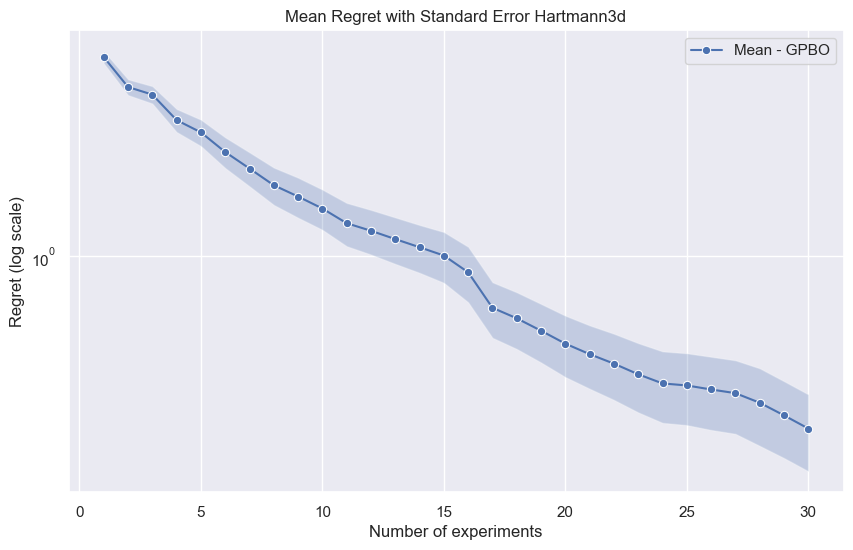

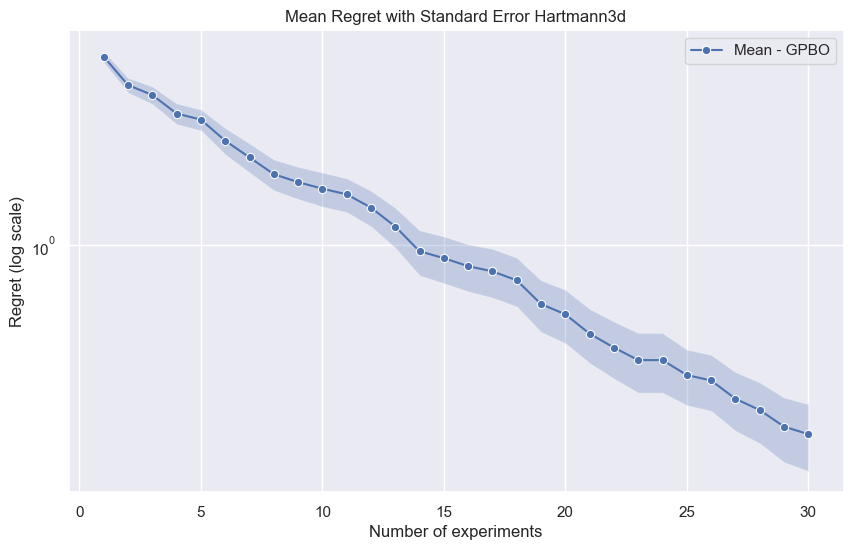

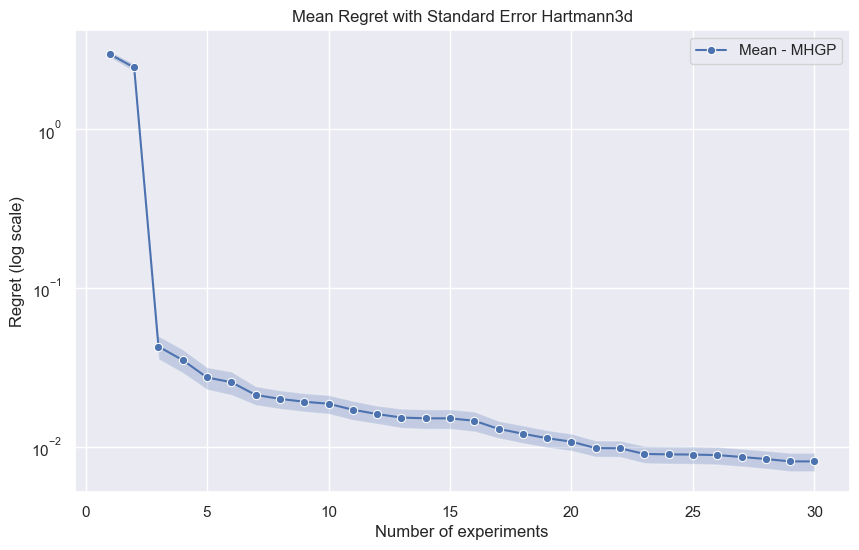

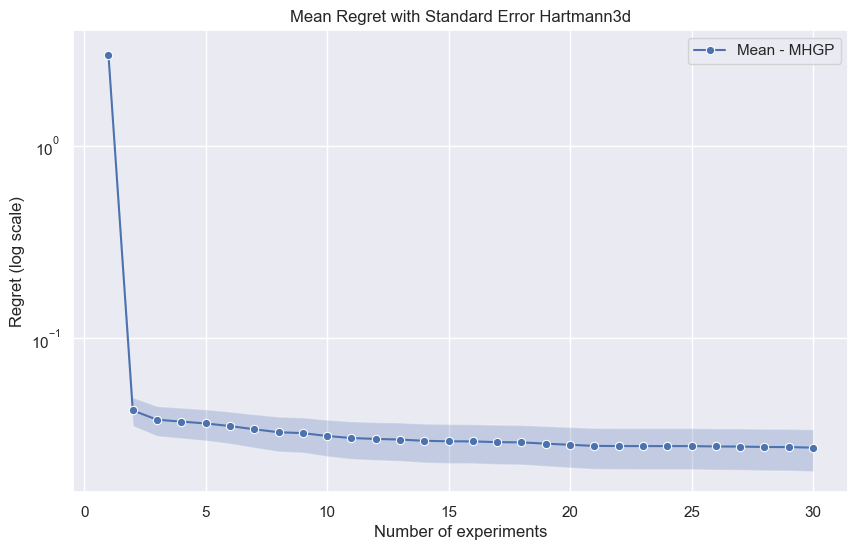

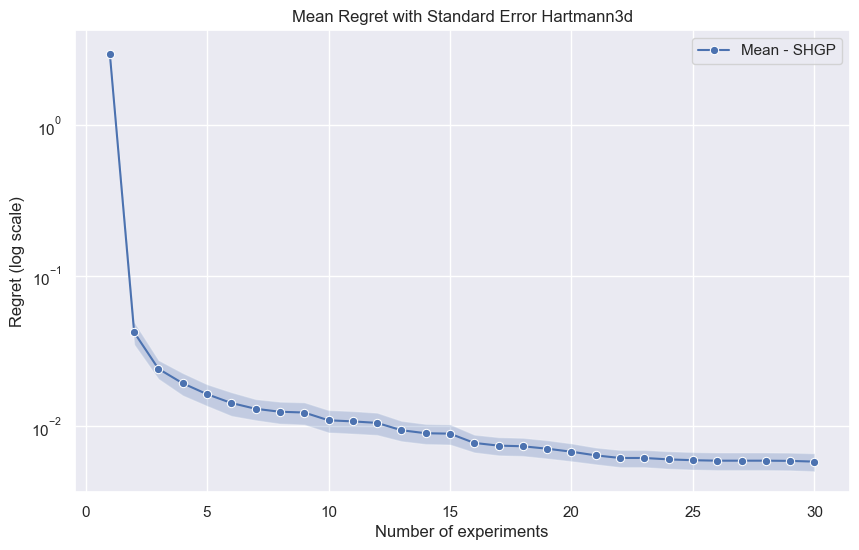

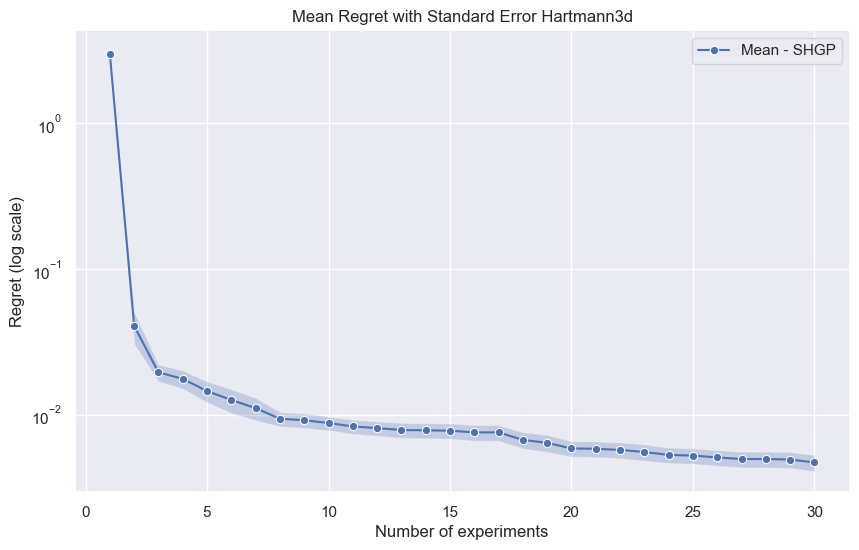

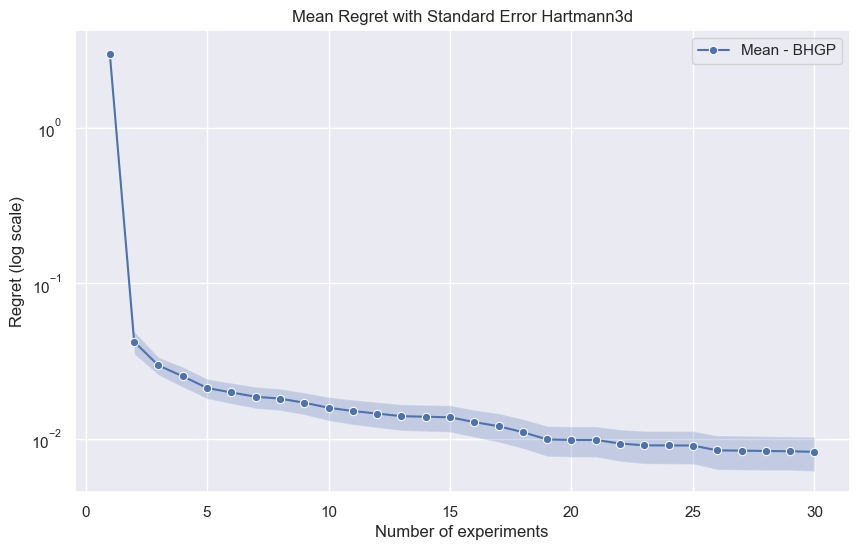

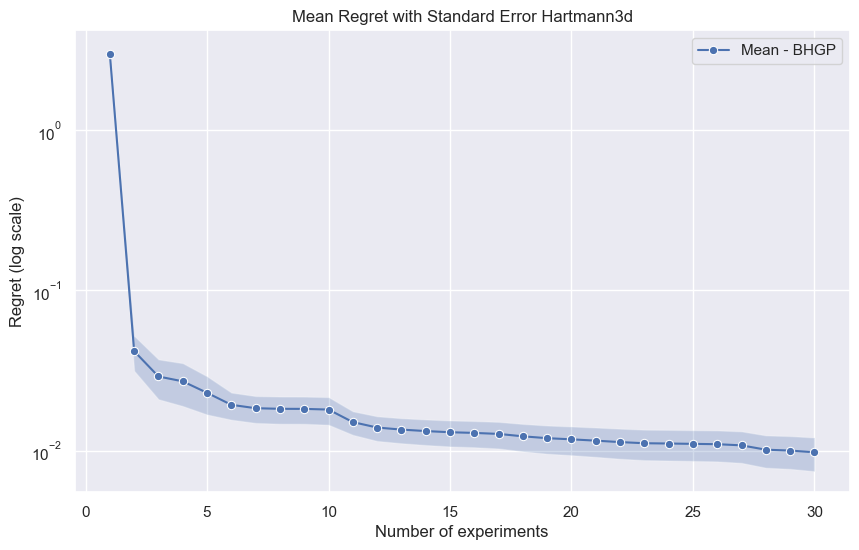

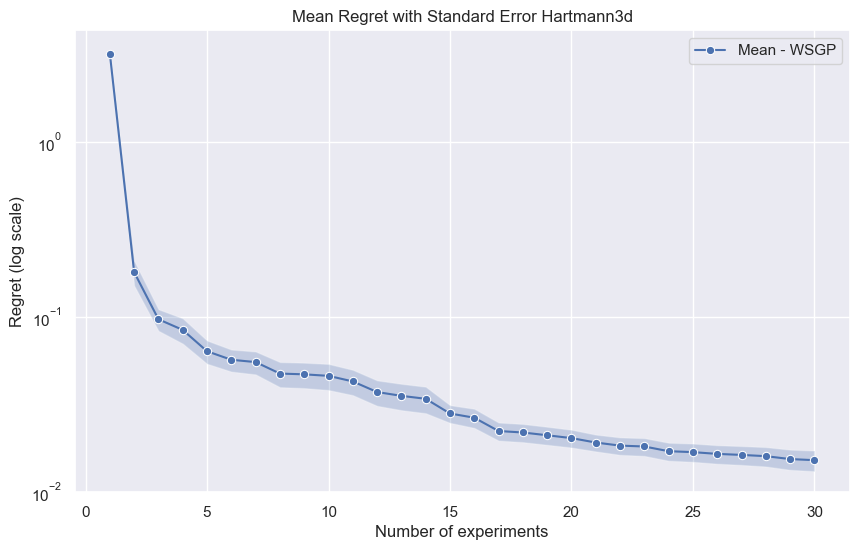

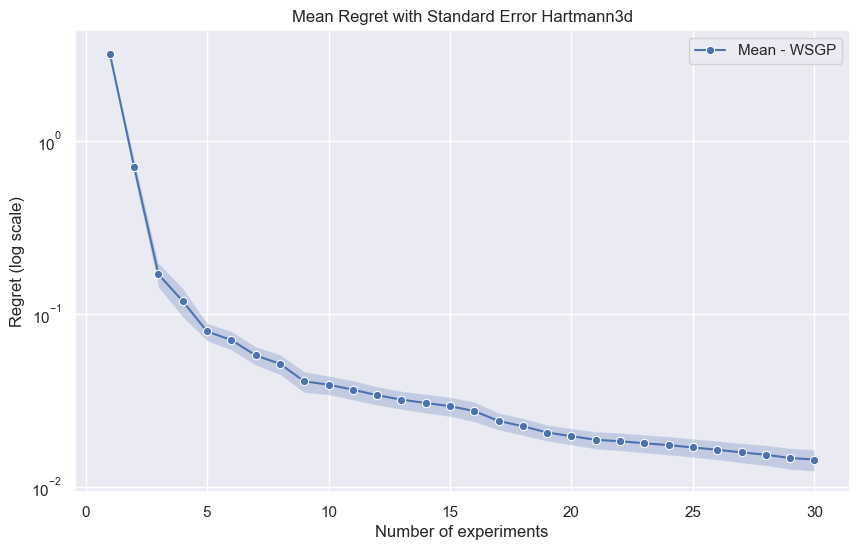

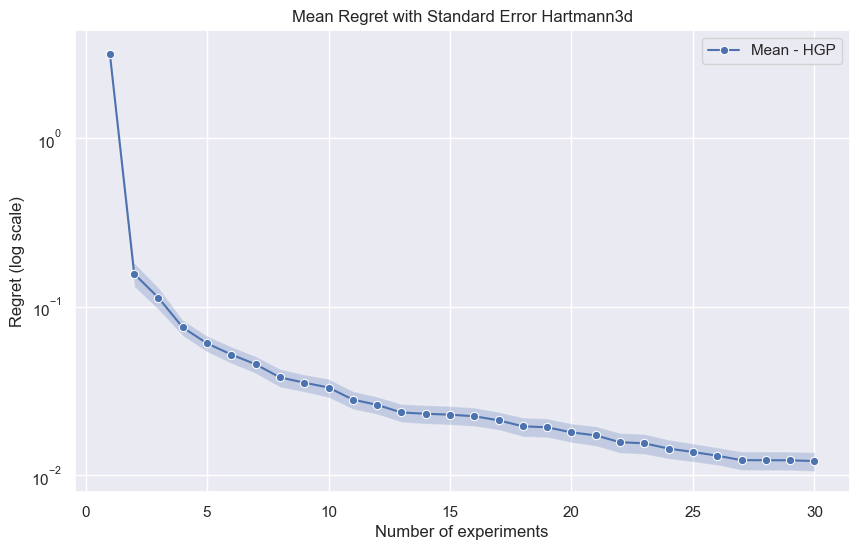

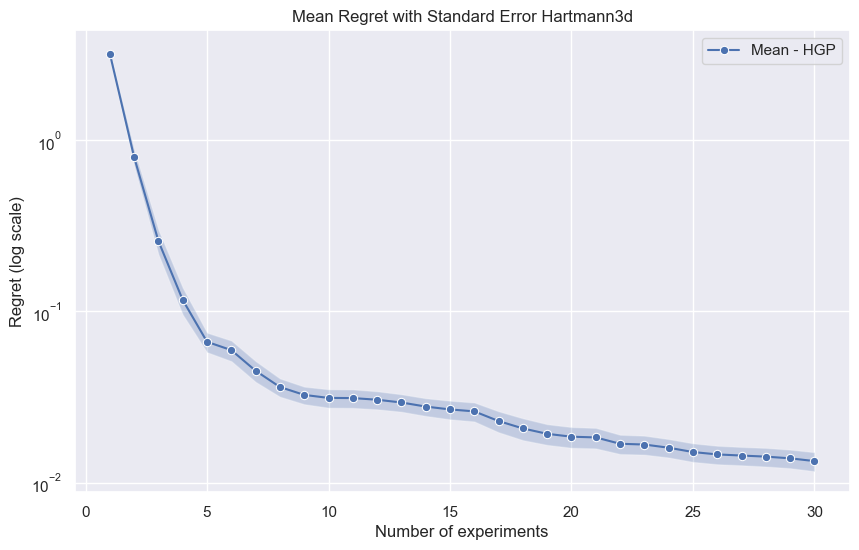

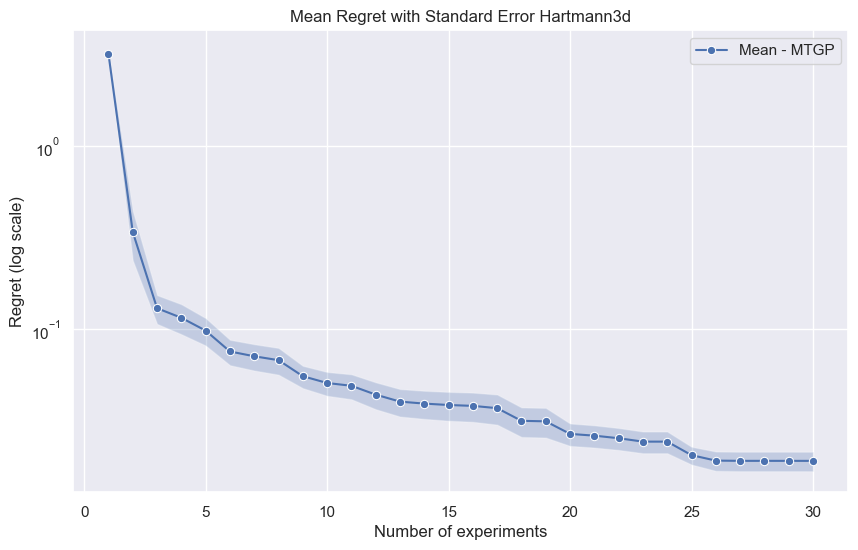

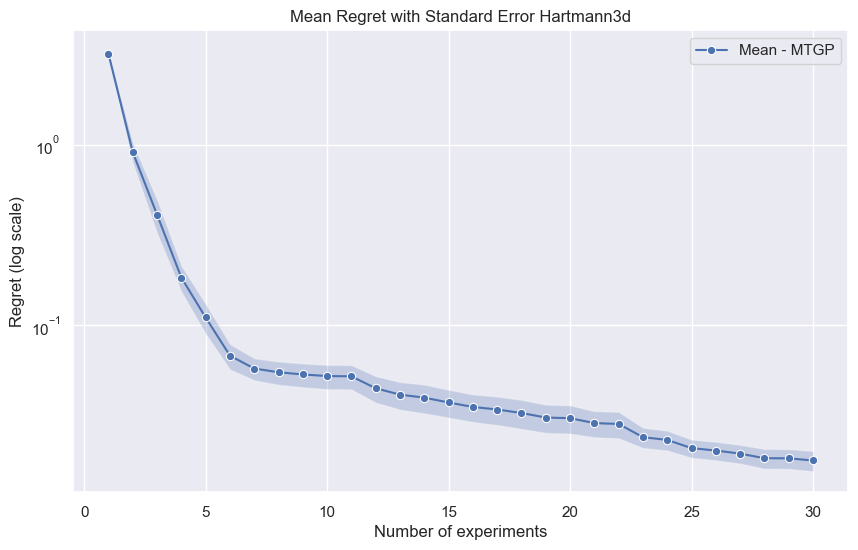

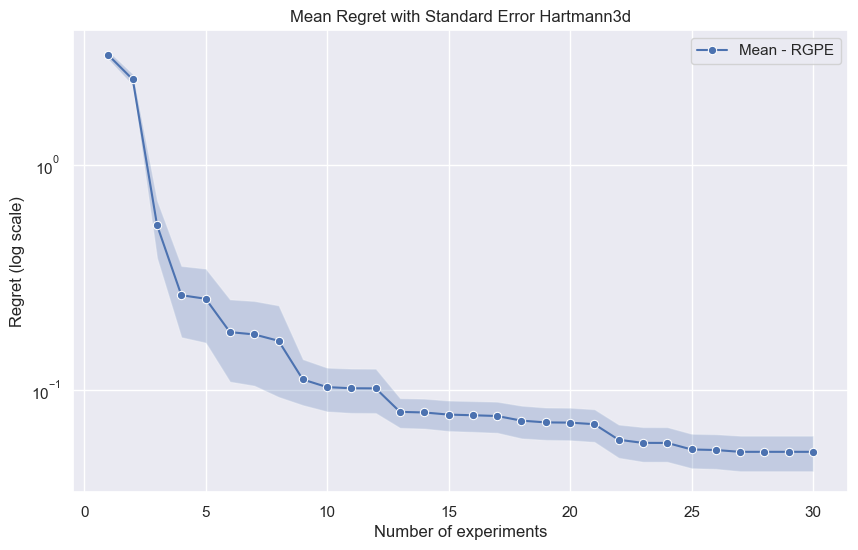

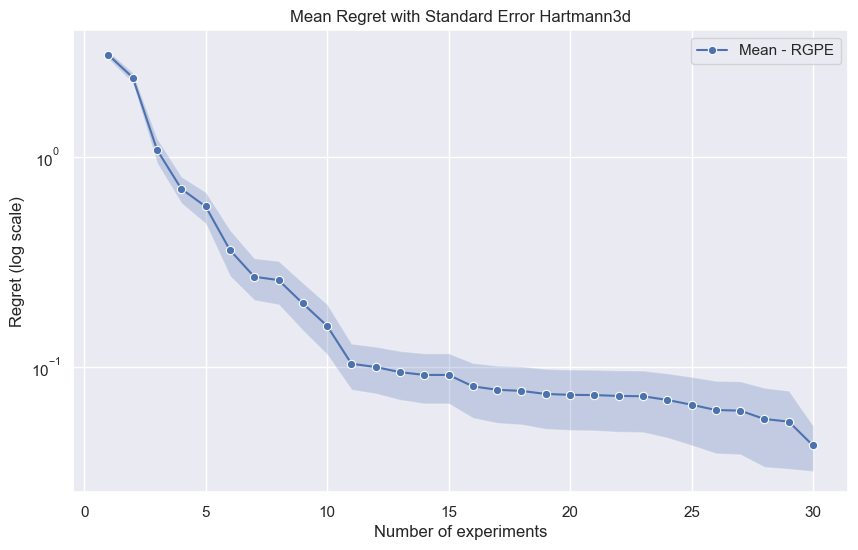

In [10]:
for i in technique_list:
    for dict in [loaded_dict_1, loaded_dict_2]:
        plot_opt_plus_uncertainty(dict[f'{i}_mean'],
                         dict[f'{i}_stderr'], i)


Expected Improvement Acquisition Function


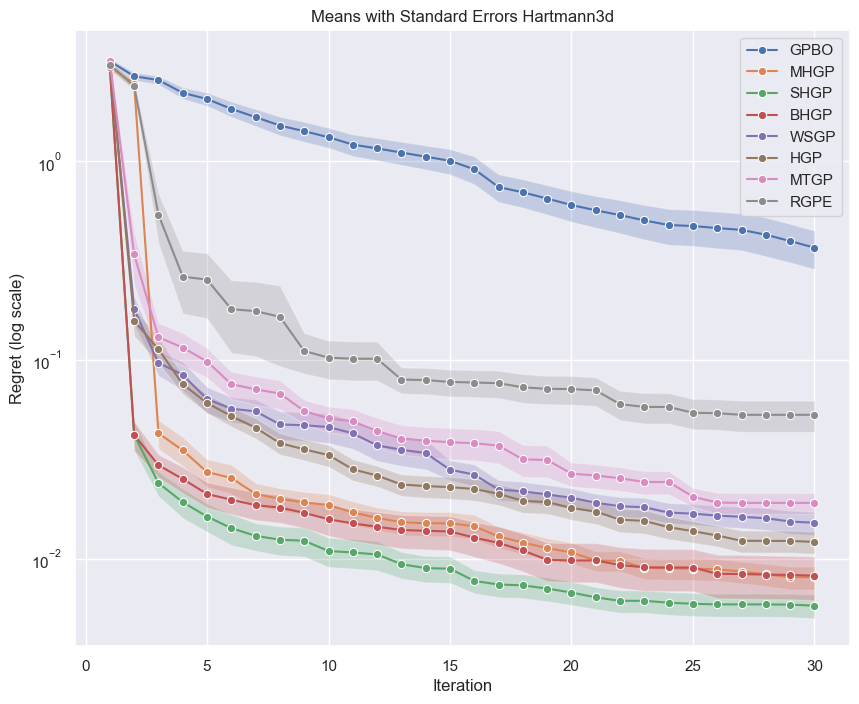

Upper Confidence Bound Acquisition Function


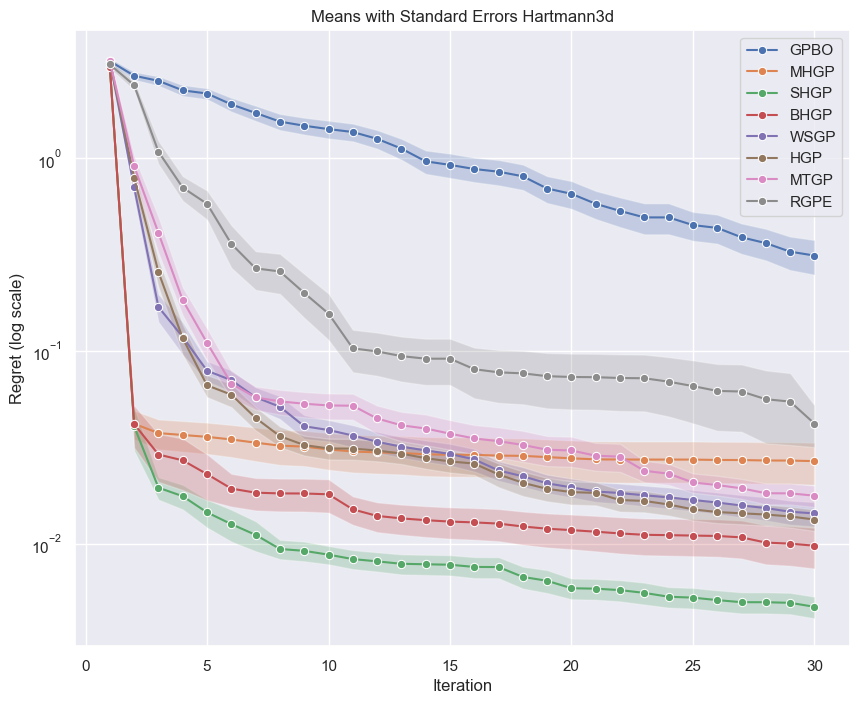

In [37]:
for d, n in zip([loaded_dict_1, loaded_dict_2], 
                ['Expected Improvement Acquisition Function', 
                 'Upper Confidence Bound Acquisition Function']):
    print(n)
    plot_means_and_errors(d)

In [12]:
for d, n in zip([loaded_dict_1, loaded_dict_2],
                ['Expected Improvement Acquisition Function', 
                 'Upper Confidence Bound Acquisition Function']
               ):
    print(f"{n}: regret_min_val = {np.amin(d['SHGP_mean']):.4f}")

Expected Improvement Acquisition Function: regret_min_val = 0.0058
Upper Confidence Bound Acquisition Function: regret_min_val = 0.0047


Expected Improvement Acquisition Function


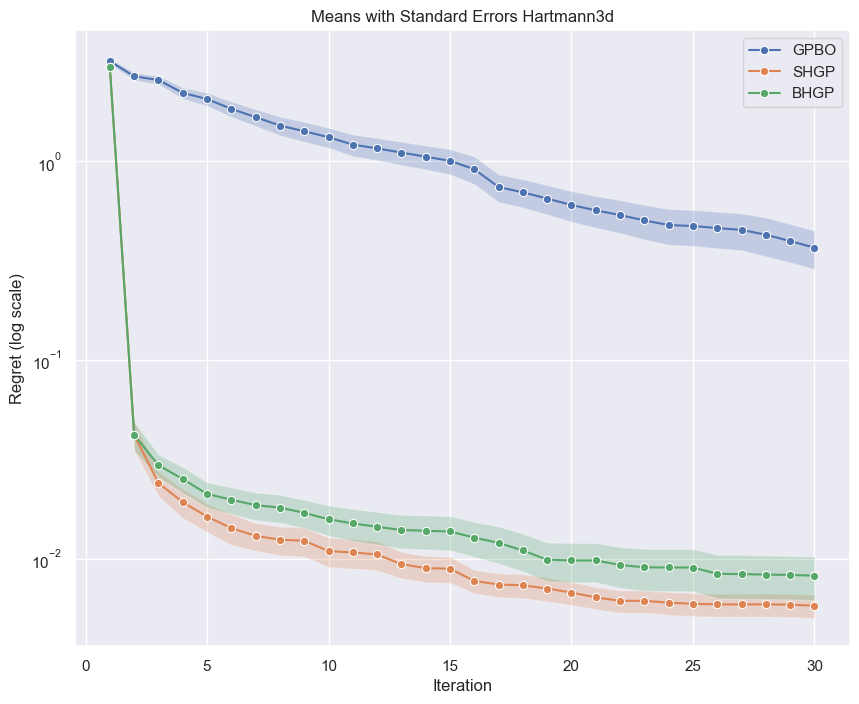

Upper Confidence Bound Acquisition Function


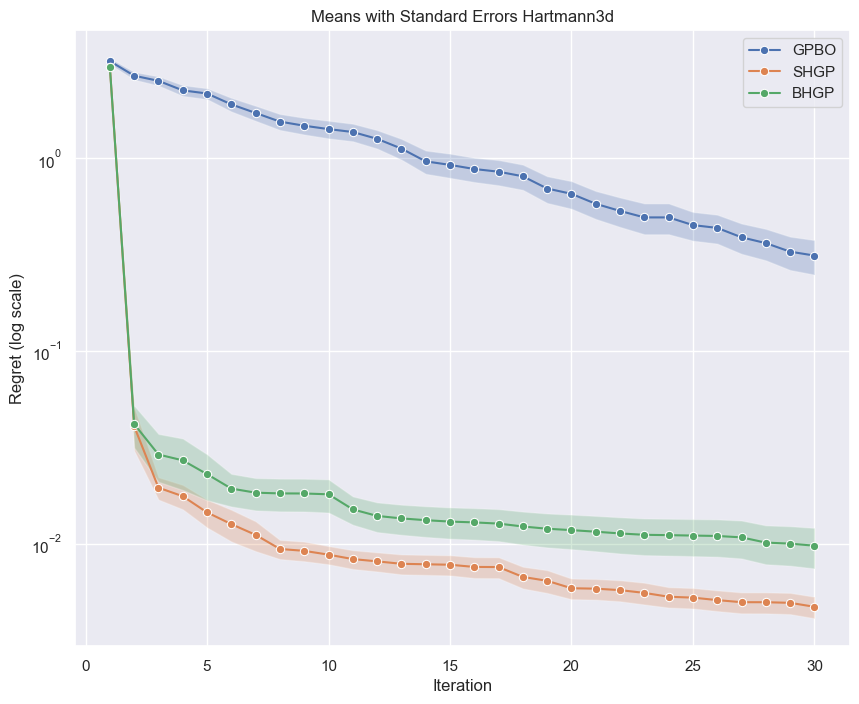

In [13]:
specific_models = ['SHGP','BHGP', 'GPBO']
for d, n in zip([loaded_dict_1, loaded_dict_2],
                ['Expected Improvement Acquisition Function', 
                 'Upper Confidence Bound Acquisition Function']
               ):
    to_plot_dict = {k: v for k, v in d.items() if any(substring in k for substring in specific_models)}
    print(n)
    plot_means_and_errors(to_plot_dict)

In [31]:
loaded_dict_2['GPBO_stderr'].shape

(30,)

## target function different from source function:

In [85]:
def run_bo_multiple_sources(technique, source_points):
    parameters.parameters['benchmark']['num_source_points'] = [source_points]
    parameters.parameters['technique'] = technique
    output = collections.defaultdict(list)
    
    for i in tqdm(range(50), desc=f'Running {technique}'):
        np.random.seed(i)
        output['iter'].append(i)
        output['regret'].append(experiment.run_experiment(parameters.parameters))
    regret_array = np.array(output['regret'])
    output_mean = np.mean(regret_array, dtype=np.float64, axis=0)
    output_std_error = np.std(regret_array, dtype=np.float64, axis=0) / np.sqrt(regret_array.shape[0])
    
    return regret_array, output_mean, output_std_error

def plot_means_and_errors_sp(result_dict, acquisition_function):
    plt.figure(figsize=(10, 8))

    for key, values in result_dict.items():
        if 'mean' in key:
            technique_name = key.split('_')[0]
            num_source = key.split('_')[-1]
            mean_array = values
            stderr_array = result_dict.get(f'{technique_name}_stderr_{num_source}', np.zeros_like(mean_array))
            
            x_values = np.arange(1,len(mean_array)+1)
            
            sns.lineplot(x=x_values, y=mean_array, label=f'{technique_name}_{num_source}', marker='o')
            plt.fill_between(x=x_values, y1=mean_array - stderr_array, y2=mean_array + stderr_array, alpha=0.25)

    plt.yscale('log')  
    plt.xlabel('Iteration')
    plt.ylabel('Regret (log scale)')
    plt.title(f'Means with Standard Errors Hartmann3d with {acquisition_function} acquisition function')
    plt.legend()
    plt.show()
    # plt.savefig('./UCB_acc/best_models_multiple_sources.png', dpi=600)
    # plt.close()

In [16]:
technique_list = ['SHGP', 'BHGP', 'MHGP', 'GPBO']
source_points_list = [1, 10, 120, 150] #10 SHGP, 60, 75 for BHGP has non-invertible matrix problems
results_dict, regret_dict = {}, {}

parameters.parameters['benchmark']['num_source_points'] = [120]
parameters.parameters
regret, mean, stderr = run_bo_50('SHGP')

#regret, mean, stderr = run_bo_multiple_sources('SHGP', 10)
# for name in technique_list:
#     for num in source_points_list:
#         regret, mean, stderr = run_bo_multiple_sources(name, num)
#         regret_dict[f'{name}_regret_{num}'] = regret
#         results_dict[f'{name}_mean_{num}'] = mean
#         results_dict[f'{name}_stderr_{num}'] = stderr



Running SHGP:   0%|          | 0/50 [00:00<?, ?it/s]

In [81]:
file_4 = '/Users/martinmejia/transfergpbo/UCB_acc/results_dict_best_multiple_sources.pkl'
file_5 = '/Users/martinmejia/transfergpbo/EI_acc/results_dict_best_multiple_sources.pkl'

with open(file_4, 'rb') as file:
    loaded_dict_4 = pickle.load(file)
loaded_dict_4

with open(file_5, 'rb') as file:
    loaded_dict_5 = pickle.load(file)
loaded_dict_5

{'SHGP_mean_1': array([3.13124444, 2.69561633, 2.56441349, 2.40869345, 2.24303599,
        2.04476207, 1.77919355, 1.65770155, 1.47345258, 1.29898666,
        1.11931892, 0.95716953, 0.77866422, 0.66964781, 0.62232407,
        0.53953828, 0.48321905, 0.45937624, 0.38127411, 0.34592531,
        0.32395085, 0.32246411, 0.26430577, 0.23369076, 0.21145315,
        0.19930587, 0.18775513, 0.1716556 , 0.156487  , 0.14103814]),
 'SHGP_stderr_1': array([0.12440028, 0.14101457, 0.15524754, 0.16192705, 0.14869018,
        0.14796833, 0.14806516, 0.15000168, 0.14364752, 0.14294762,
        0.1381898 , 0.13517361, 0.1287246 , 0.12454169, 0.12040889,
        0.11532683, 0.1105343 , 0.11128922, 0.10361037, 0.10077705,
        0.09565376, 0.09572601, 0.08213163, 0.07847565, 0.07627976,
        0.07521975, 0.07499326, 0.07335966, 0.07210991, 0.06862866]),
 'SHGP_mean_60': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 

In [74]:
#{k : v for k, v in loaded_dict_4.items() if not np.all(v == 0) and k.startswith('SHGP')}

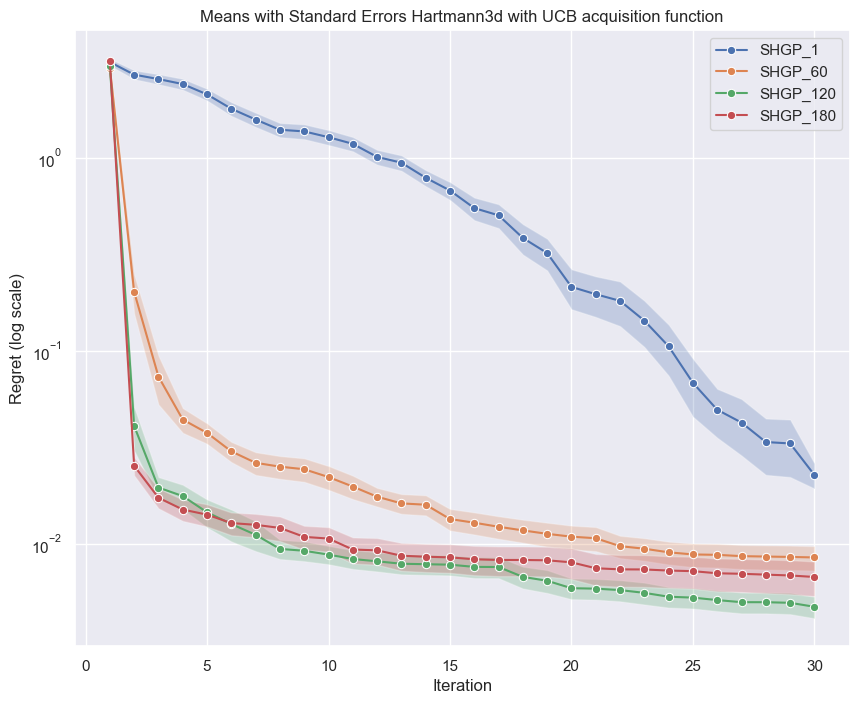

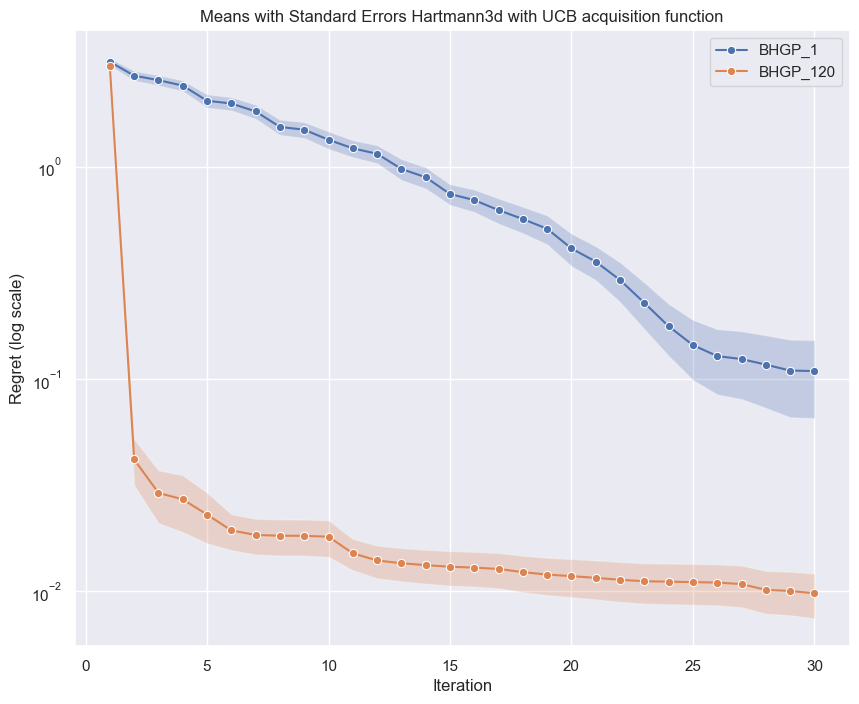

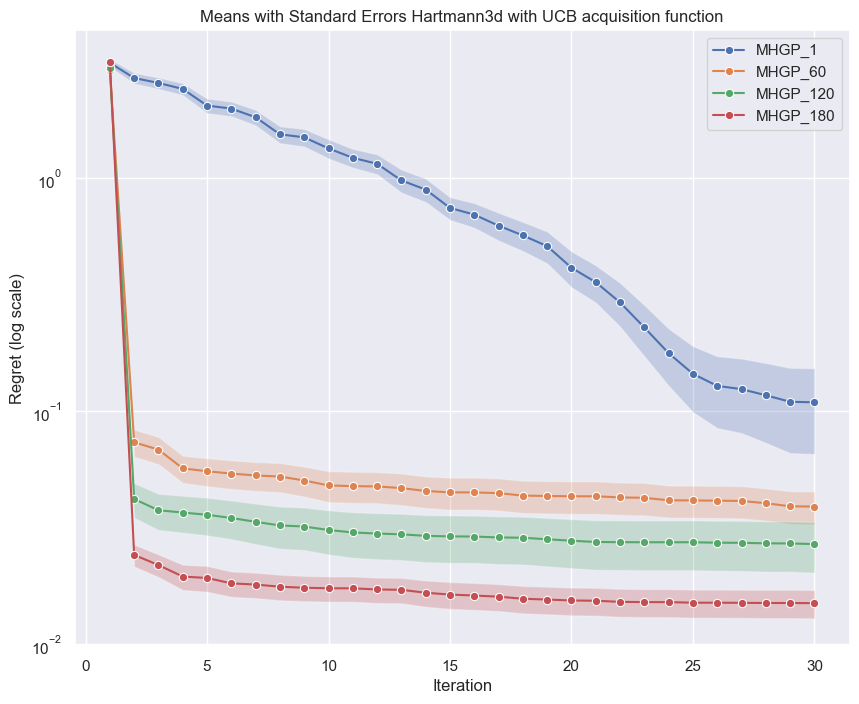

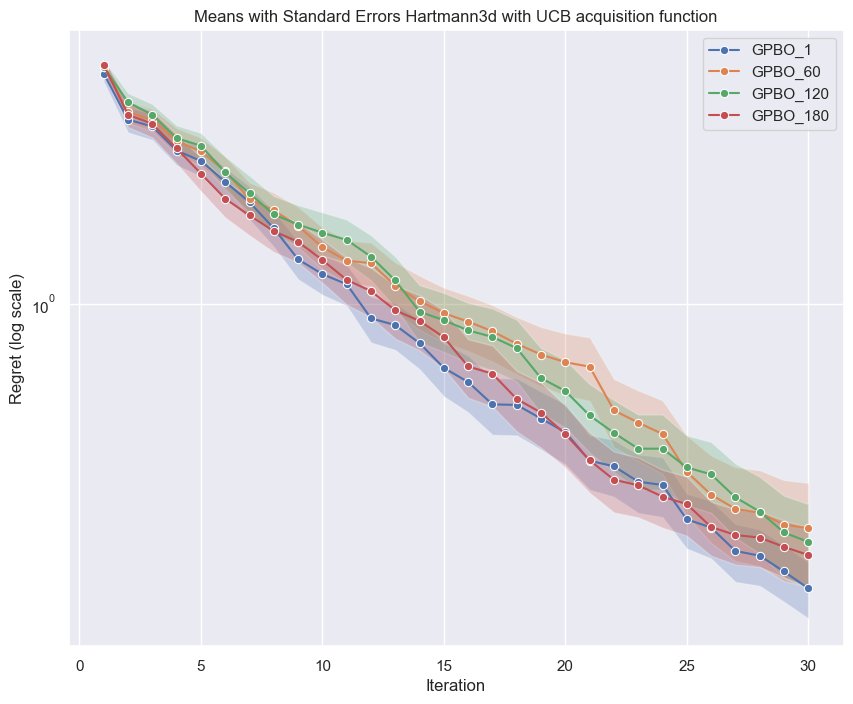

In [86]:
for name in technique_list:
    plot_means_and_errors_sp({k : v for k, v in loaded_dict_4.items() if not np.all(v == 0) and k.startswith(name)}, 
                            'UCB')

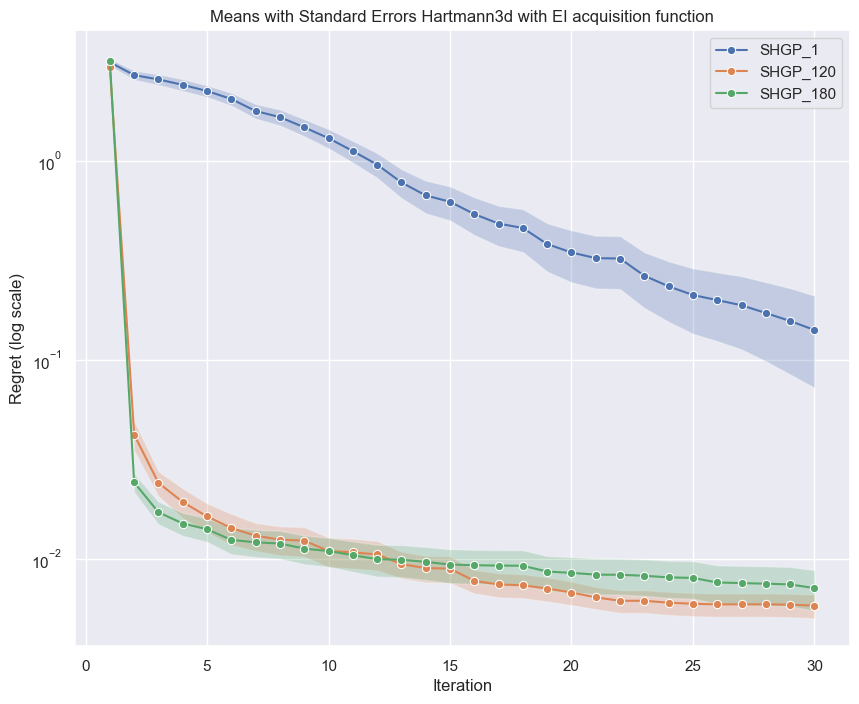

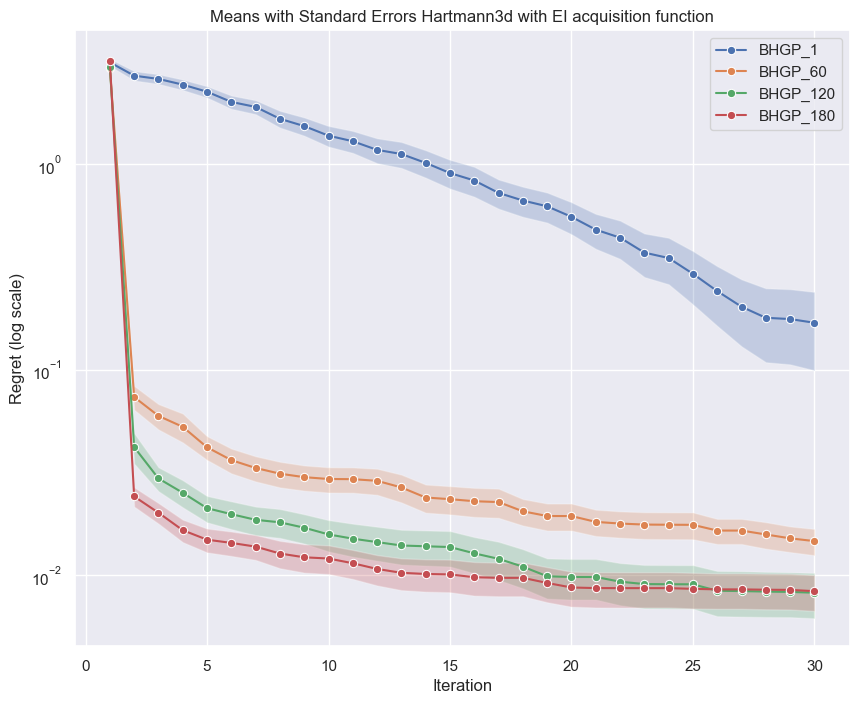

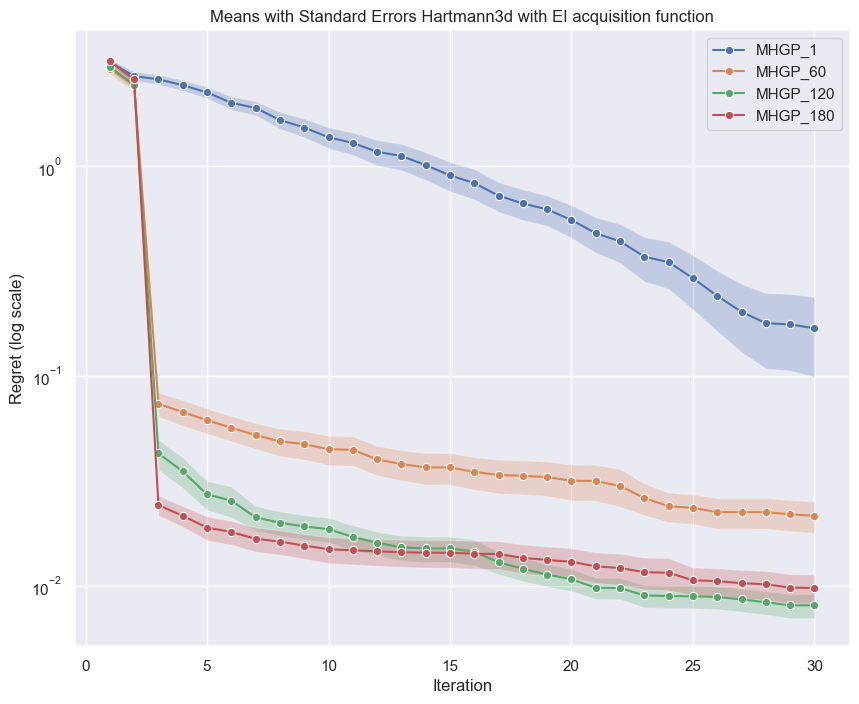

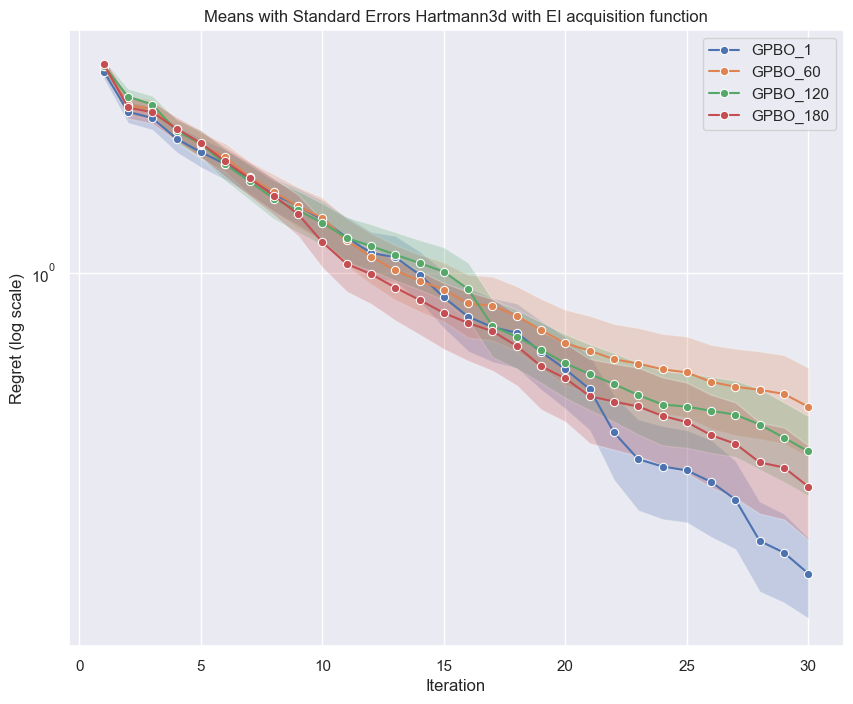

In [87]:
for name in technique_list:
    plot_means_and_errors_sp({k : v for k, v in loaded_dict_5.items() if not np.all(v == 0) and k.startswith(name)}, 
                            'EI')

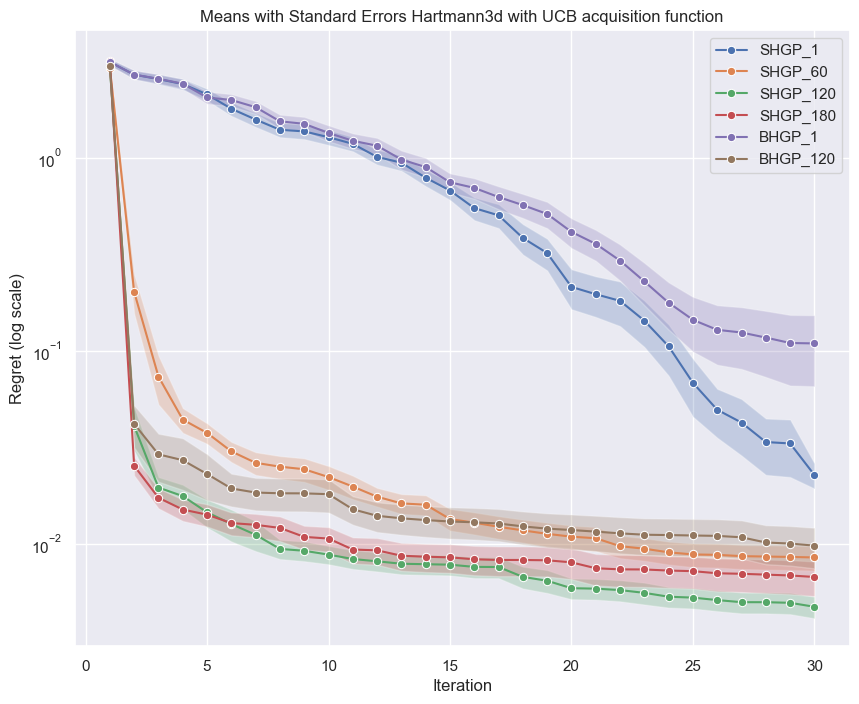

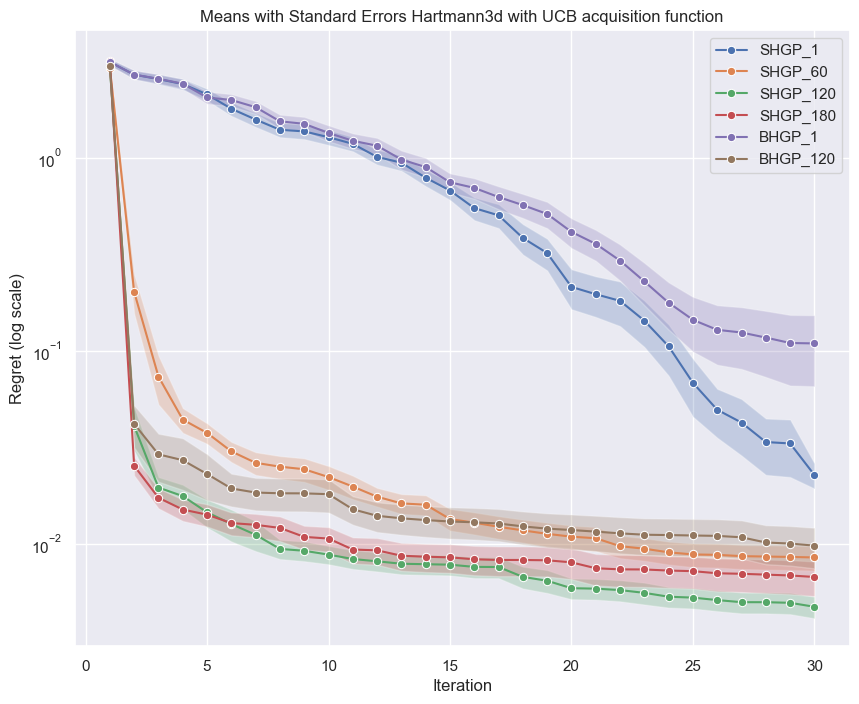

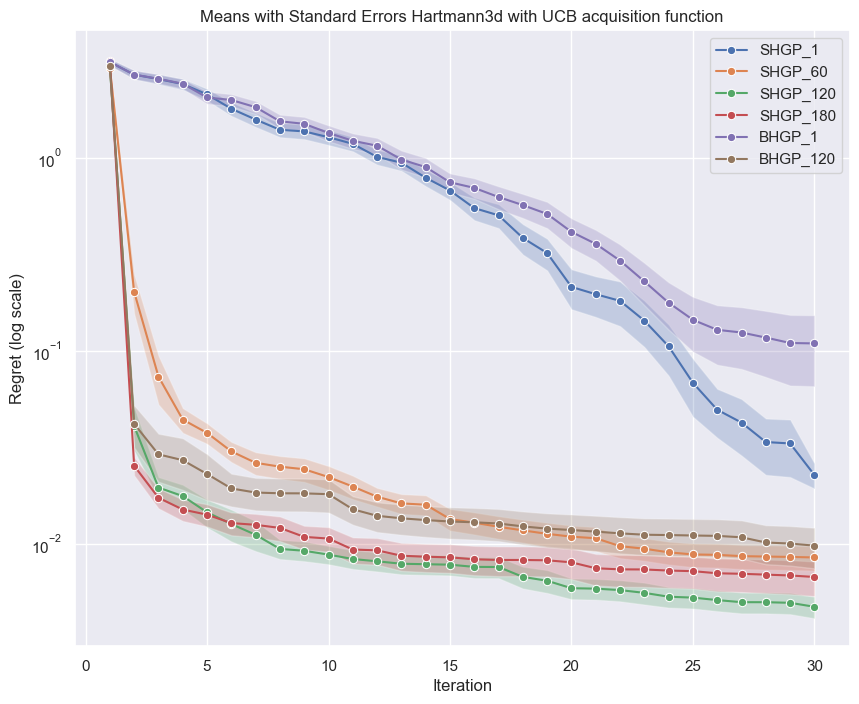

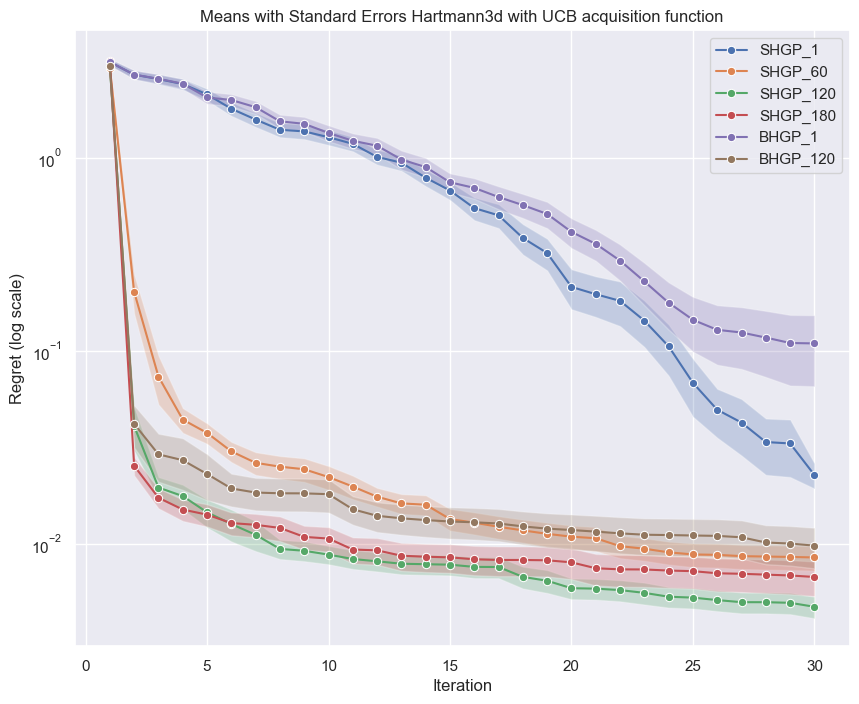

In [94]:
s_b_hgp_dic4 = {k : v for k, v in loaded_dict_4.items() if not np.all(v == 0) and any(substring in k for substring in ['SHGP', 'BHGP'])}
s_b_hgp_dic5 = {k : v for k, v in loaded_dict_5.items() if not np.all(v == 0) and any(substring in k for substring in ['SHGP', 'BHGP'])}
for name in technique_list:
    plot_means_and_errors_sp(s_b_hgp_dic4, 'UCB')

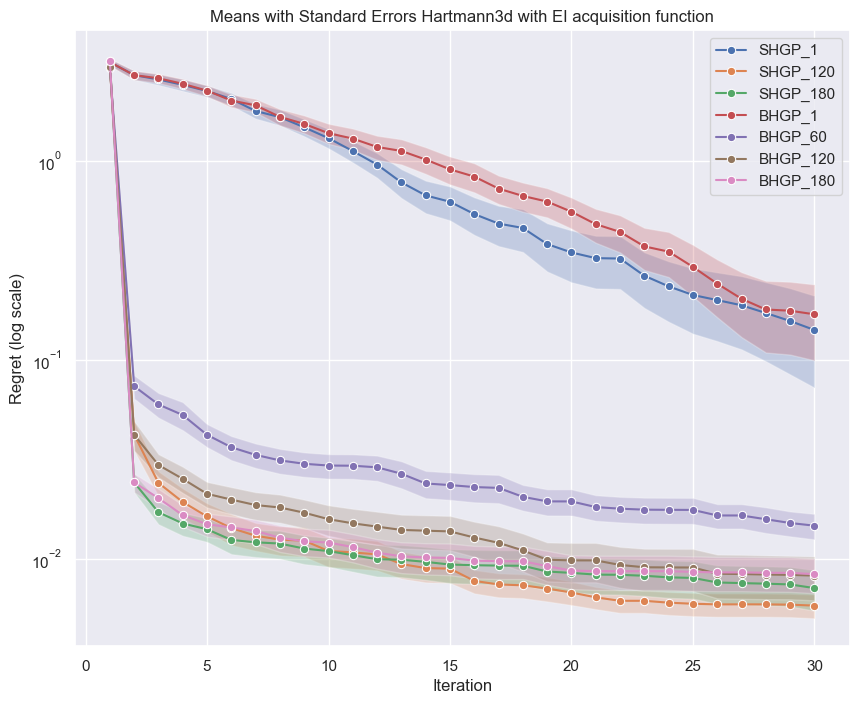

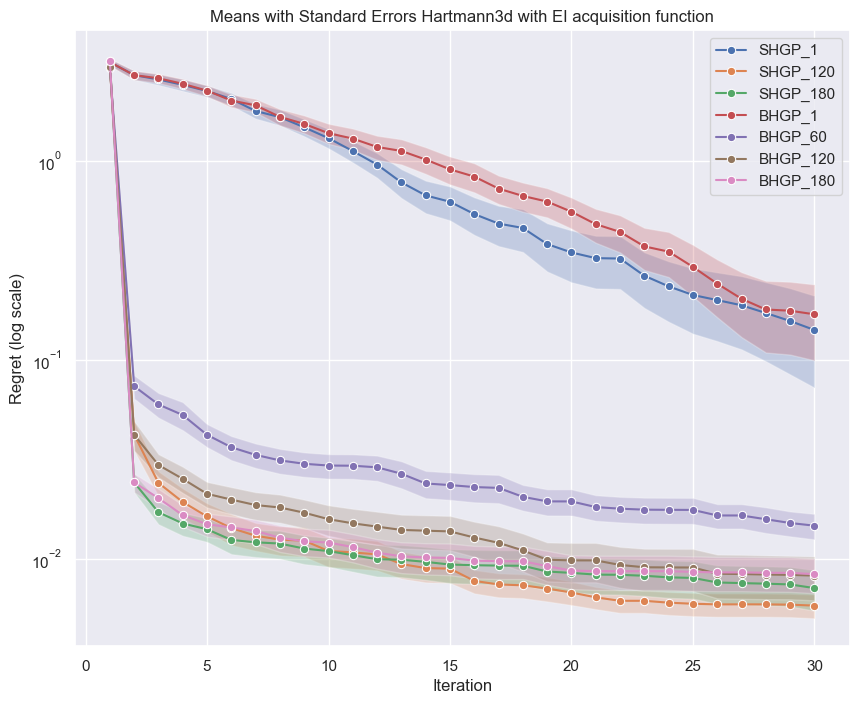

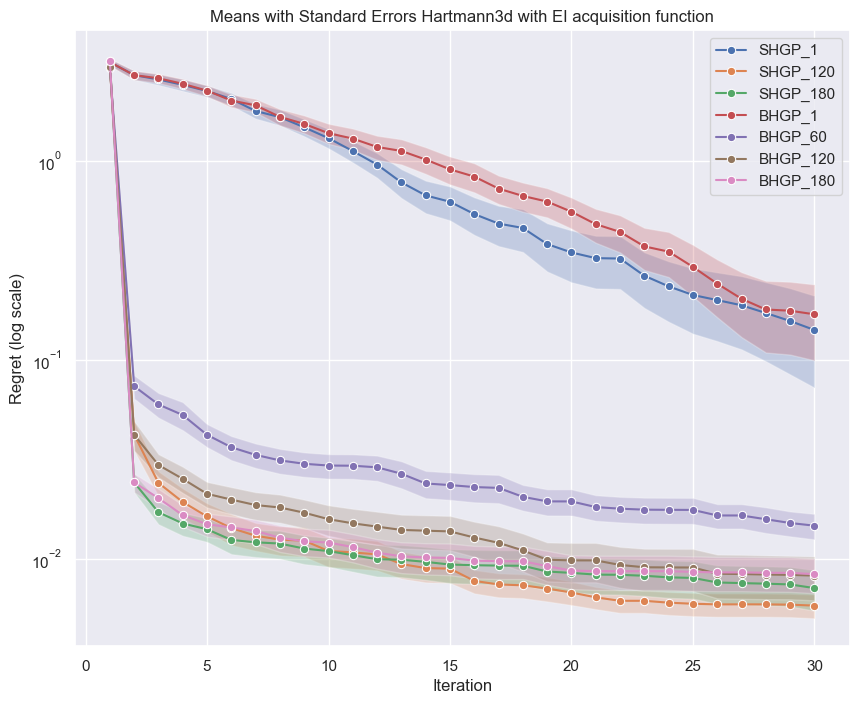

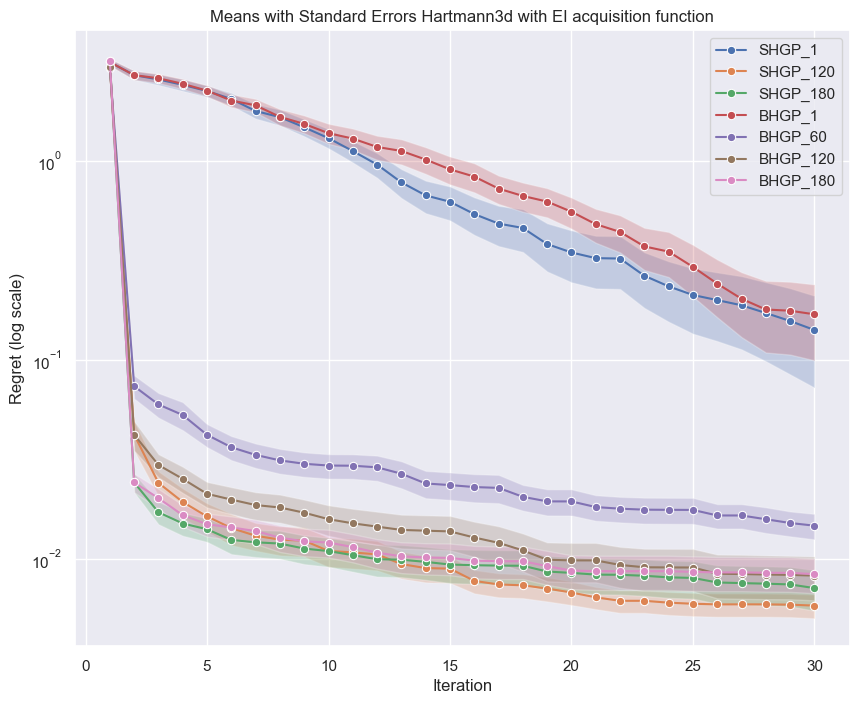

In [95]:
for name in technique_list:
    plot_means_and_errors_sp(s_b_hgp_dic5, 'EI')

In [391]:
import pickle

file_a = './results_dict_arrays_aall.pkl'
with open(file_a, 'rb') as file:
    loaded_array_a = pickle.load(file)
loaded_array_a




{'GPBO_f_observed': array([[[-2.37474585e+00],
         [-1.01734939e+00],
         [-2.27028559e+00],
         [-1.32750419e+00],
         [-2.58537039e+00],
         [-2.00954136e+00],
         [-4.75087767e-01],
         [-1.87000429e+00],
         [-3.89902683e+00],
         [-3.18401290e+00]],
 
        [[-8.04470035e-01],
         [-2.17712693e+00],
         [-1.60110384e+00],
         [-2.51829199e+00],
         [-2.51181861e+00],
         [-2.71153285e+00],
         [-2.58958697e+00],
         [-1.88917426e+00],
         [-3.32944208e-01],
         [-2.60814769e+00]],
 
        [[-8.98914264e-01],
         [-3.93285718e-01],
         [-7.15281636e-01],
         [-6.55062533e-01],
         [-6.42115334e-01],
         [-8.19905863e-01],
         [-5.81983981e-01],
         [-4.94258336e-01],
         [-2.69466905e-01],
         [-7.84174482e-01]],
 
        [[-1.25005811e+00],
         [-2.61278293e-01],
         [-9.98922735e-01],
         [-1.26229335e+00],
         [-1.6579921

In [392]:
for k, v in loaded_array_a.items():
    print(k, v.shape)

GPBO_f_observed (50, 10, 1)
SHGP_3_f_observed (49, 10, 1)
SHGP_6_f_observed (49, 10, 1)
SHGP_9_f_observed (49, 10, 1)
SHGP_15_f_observed (48, 10, 1)
SHGP_24_f_observed (50, 10, 1)
SHGP_60_f_observed (50, 10, 1)
BHGP_3_f_observed (50, 10, 1)
BHGP_6_f_observed (50, 10, 1)
BHGP_9_f_observed (50, 10, 1)
BHGP_15_f_observed (49, 10, 1)
BHGP_24_f_observed (50, 10, 1)
BHGP_60_f_observed (50, 10, 1)
MHGP_3_f_observed (50, 10, 1)
MHGP_6_f_observed (50, 10, 1)
MHGP_9_f_observed (50, 10, 1)
MHGP_15_f_observed (50, 10, 1)
MHGP_24_f_observed (50, 10, 1)
MHGP_60_f_observed (50, 10, 1)
HGP_3_f_observed (50, 10, 1)
HGP_6_f_observed (50, 10, 1)
HGP_9_f_observed (50, 10, 1)
HGP_15_f_observed (50, 10, 1)
HGP_24_f_observed (50, 10, 1)
HGP_60_f_observed (50, 10, 1)
MTGP_3_f_observed (50, 10, 1)
MTGP_6_f_observed (50, 10, 1)
MTGP_9_f_observed (50, 10, 1)
MTGP_15_f_observed (50, 10, 1)
MTGP_24_f_observed (50, 10, 1)
MTGP_60_f_observed (50, 10, 1)
RGPE_3_f_observed (50, 10, 1)
RGPE_6_f_observed (50, 10, 1)
RGP

In [393]:
def pad_arrays(dictionary, desired_shape=(50, 10, 1)):
    padded_dict = {}
    for key, array in dictionary.items():
        padding_needed = [(0, desired_shape[i] - array.shape[i]) for i in range(len(desired_shape))]
        padded_array = np.pad(array, padding_needed, mode='constant', constant_values=np.nan)
        padded_dict[key] = padded_array
    return padded_dict

In [394]:
paded_dict = pad_arrays(loaded_array_a, desired_shape=(50, 10, 1))

for k, v in paded_dict.items():
    print(k, v.shape)



GPBO_f_observed (50, 10, 1)
SHGP_3_f_observed (50, 10, 1)
SHGP_6_f_observed (50, 10, 1)
SHGP_9_f_observed (50, 10, 1)
SHGP_15_f_observed (50, 10, 1)
SHGP_24_f_observed (50, 10, 1)
SHGP_60_f_observed (50, 10, 1)
BHGP_3_f_observed (50, 10, 1)
BHGP_6_f_observed (50, 10, 1)
BHGP_9_f_observed (50, 10, 1)
BHGP_15_f_observed (50, 10, 1)
BHGP_24_f_observed (50, 10, 1)
BHGP_60_f_observed (50, 10, 1)
MHGP_3_f_observed (50, 10, 1)
MHGP_6_f_observed (50, 10, 1)
MHGP_9_f_observed (50, 10, 1)
MHGP_15_f_observed (50, 10, 1)
MHGP_24_f_observed (50, 10, 1)
MHGP_60_f_observed (50, 10, 1)
HGP_3_f_observed (50, 10, 1)
HGP_6_f_observed (50, 10, 1)
HGP_9_f_observed (50, 10, 1)
HGP_15_f_observed (50, 10, 1)
HGP_24_f_observed (50, 10, 1)
HGP_60_f_observed (50, 10, 1)
MTGP_3_f_observed (50, 10, 1)
MTGP_6_f_observed (50, 10, 1)
MTGP_9_f_observed (50, 10, 1)
MTGP_15_f_observed (50, 10, 1)
MTGP_24_f_observed (50, 10, 1)
MTGP_60_f_observed (50, 10, 1)
RGPE_3_f_observed (50, 10, 1)
RGPE_6_f_observed (50, 10, 1)
RGP

In [400]:

def create_dataframes(paded_dict):
    keyword_mapping = {'GPBO': 0, '3': 1, '6': 2, '15': 5, '24': 8,  '60': 20}
    
    #{prefix.split('_f')[0]: idx for idx, (prefix, _) in enumerate(sorted(paded_dict.items()))}

    dataframes = {}

    for k, v in paded_dict.items():
        prefix = k.split('_f')[0].split('_')[-1]
        value = keyword_mapping.get(prefix, -1)
        if value != -1:
            df = pd.DataFrame({
                'percentage_data_used': [value for _ in range(500)],
                'iteration': [i % 10 for i in range(50 * 10)],
                'number_of_experiments': [i % 10 + 1 for i in range(50 * 10)],
                'f_measured': v.flatten().tolist()
            })
            dataframes[k] = df  

    # Concatenate all dataframes into a single dataframe
    concatenated_df = pd.concat(dataframes.values(), ignore_index=True)

    return concatenated_df


In [401]:
d_1 = {k : v.flatten() for k,v in paded_dict.items() if any(s in k for s in ['GPBO', 'SHGP'])}

In [402]:
create_dataframes(paded_dict)['percentage_data_used'].values

array([ 0,  0,  0, ..., 20, 20, 20])

In [403]:
def plot_from_df(result_dict):
    plt.figure(figsize=(10, 8))
    
    data = create_dataframes({k : v.flatten() for k,v in result_dict.items()})
    sns.lineplot(data=data, x="number_of_experiments", y="f_measured", hue="percentage_data_used", marker='o')

    plt.legend(loc='best')

    plt.show()

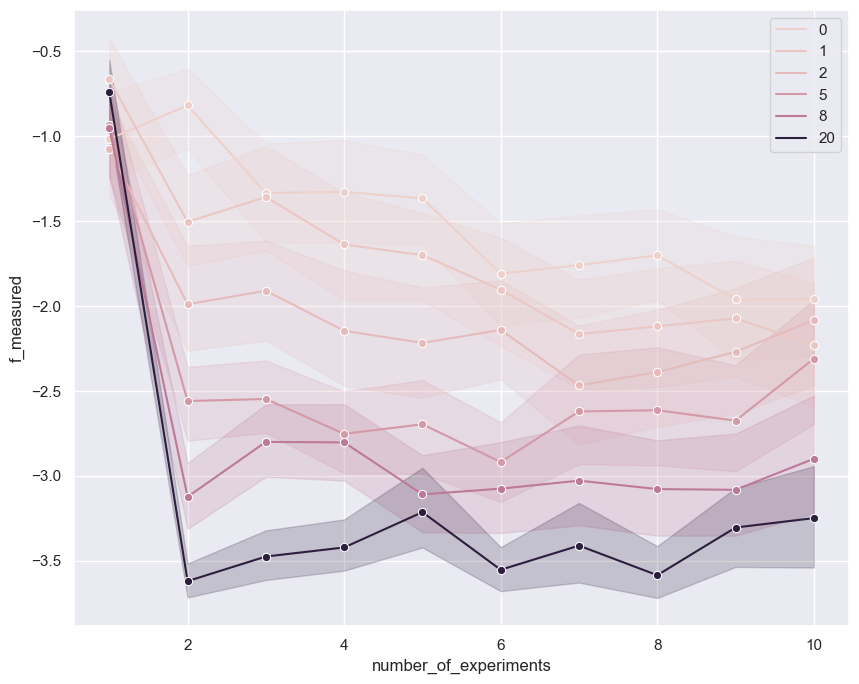

In [404]:
plot_from_df({k : v.flatten() for k,v in paded_dict.items() if any(s in k for s in ['GPBO', 'HGP']) and 
                  not k.startswith(('S', 'B', 'M'))})

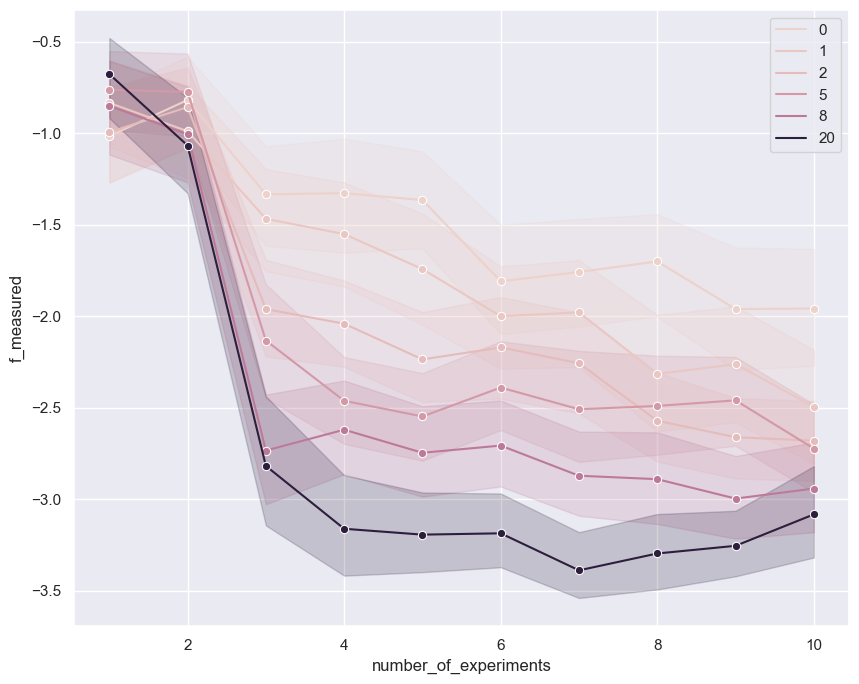

In [405]:
plot_from_df({k : v.flatten() for k,v in paded_dict.items() if any(s in k for s in ['GPBO', 'RGPE'])})

In [487]:
file = '/Users/martinmejia/Desktop/baybe_continuous_snapshots/to_compare_transfergpbo/baybe_continous_results_trgpbo_50.csv'
baybe_df = pd.read_csv(file)#[['Scenario','Iteration', 'Num_Experiments', 'Target_CumBest']]
baybe_df = baybe_df.rename(columns={"Scenario":"num_clusters", 
                        "Iteration":"iteration", 
                        "Num_Experiments":"number_of_experiments",
                        "Target_CumBest":"f_measured"})
# baybe_df = pd.read_csv(file)
baybe_df

num_clusters  Random_Seed  Initial_Data  iteration  \
0               1         1337             0          0   
1               1         1337             0          1   
2               1         1337             0          2   
3               1         1337             0          3   
4               1         1337             0          4   
...           ...          ...           ...        ...   
3495     Baseline         1337            49          5   
3496     Baseline         1337            49          6   
3497     Baseline         1337            49          7   
3498     Baseline         1337            49          8   
3499     Baseline         1337            49          9   

      number_of_experiments     Target_Measurements  Target_IterBest  \
0                         1    [0.1482684314250946]         0.148268   
1                         2   [-0.2967342734336853]        -0.296734   
2                         3    [-1.278749942779541]        -1.278750   
3                         4   [-0.7480088472366333]        -0.748009   
4                         5    [-1.009378433227539]        -1.009378   
...                     ...                     ...              ...   
3495                      6  [-0.30431222915649414]        -0.304312   
3496                      7   [-0.0570400096476078]        -0.057040   
3497                      8   [-2.3364005088806152]        -2.336401   
3498                      9   [-0.1936204731464386]        -0.193620   
3499                     10   [-0.9551146030426025]        -0.955115   

      f_measured  
0       0.148268  
1      -0.296734  
2      -1.278750  
3      -1.278750  
4      -1.278750  
...          ...  
3495   -0.417434  
3496   -0.417434  
3497   -2.336401  
3498   -2.336401  
3499   -2.336401  

[3500 rows x 8 columns]

In [488]:
set(baybe_df['num_clusters'].values)

{'1', '2', '20', '3', '5', '8', 'Baseline'}

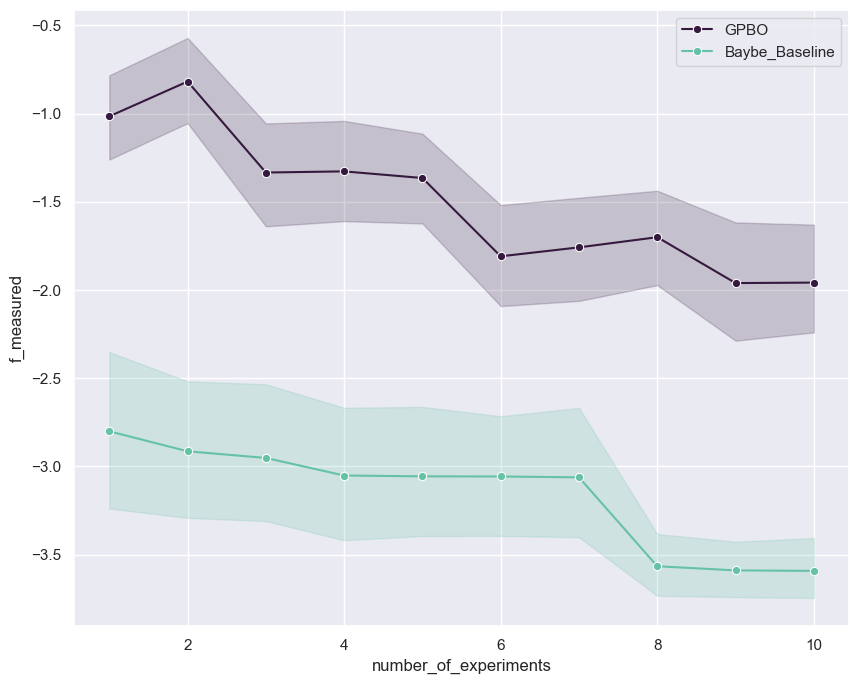

In [489]:
### Plot 1 a) ###

plt.figure(figsize=(10, 8))
palette_1 = sns.color_palette("rocket")
palette_2 = sns.color_palette("Set2")

# data = create_dataframes({k : v.flatten() for k,v in paded_dict.items() if any(s in k for s in ['HGP']) and 
#                   not k.startswith(('S', 'B', 'M'))})
data = create_dataframes({k : v.flatten() for k,v in paded_dict.items() if any(s in k for s in ['GPBO'])})
sns.lineplot(data=data, x="number_of_experiments", y="f_measured", hue="percentage_data_used", marker='o',
             palette=palette_1, label='GPBO', legend=False)
sns.lineplot(data=baybe_df[baybe_df['num_clusters']=='Baseline'], x="number_of_experiments", y="f_measured", 
             hue="num_clusters", marker='o', palette=palette_2, label='Baybe_Baseline', legend=False)
plt.legend(loc='best')
plt.show()

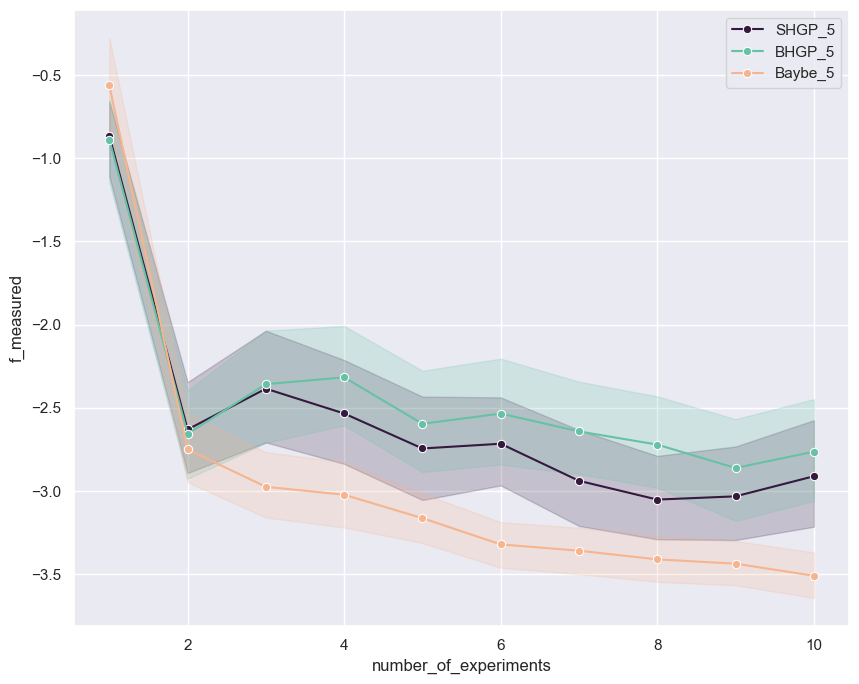

In [490]:
### Plot 1b) ###

plt.figure(figsize=(10, 8))
palette_1 = sns.color_palette("rocket")
palette_2 = sns.color_palette("Set2")
palette_3 = sns.color_palette("rocket_r")

# data = create_dataframes({k : v.flatten() for k,v in paded_dict.items() if any(s in k for s in ['HGP']) and 
#                   not k.startswith(('S', 'B', 'M'))})
data_0 = create_dataframes({k : v.flatten() for k,v in paded_dict.items() if any(s in k for s in ['SHGP_15'])})
data_1 = create_dataframes({k : v.flatten() for k,v in paded_dict.items() if any(s in k for s in ['BHGP_15'])})
sns.lineplot(data=data_0, x="number_of_experiments", y="f_measured", hue="percentage_data_used", marker='o',
            palette=palette_1, label='SHGP_5', legend=False)
sns.lineplot(data=data_1, x="number_of_experiments", y="f_measured", hue="percentage_data_used", marker='o',
            palette=palette_2, label='BHGP_5', legend=False)
sns.lineplot(data=baybe_df[baybe_df['num_clusters']=='5'], x="number_of_experiments", y="f_measured", 
             hue="num_clusters", marker='o', palette=palette_3, label='Baybe_5', legend=False)
plt.legend(loc='best')
plt.show()

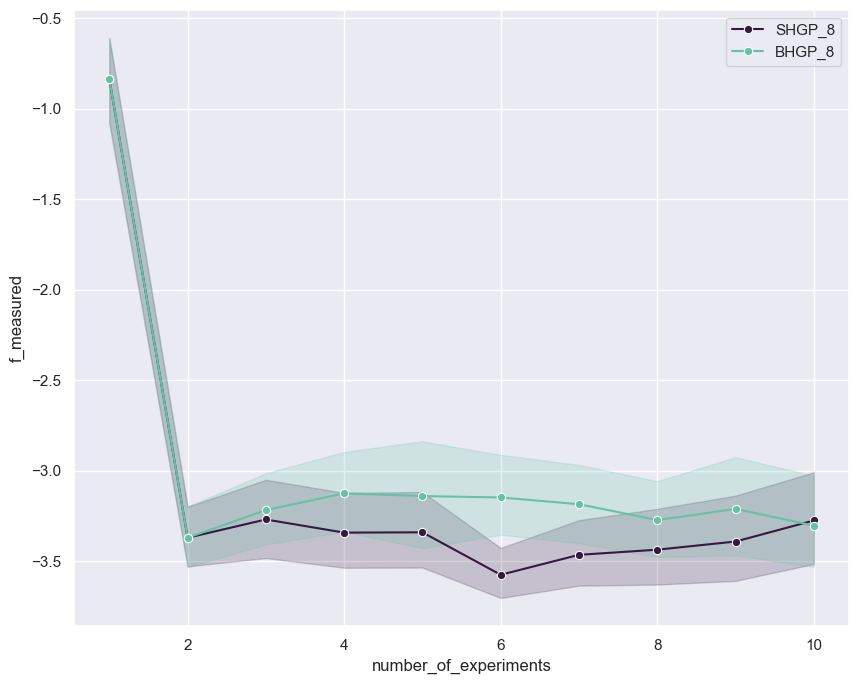

In [491]:
### Plot 2a) ###

plt.figure(figsize=(10, 8))
palette_1 = sns.color_palette("rocket")
palette_2 = sns.color_palette("Set2")
palette_3 = sns.color_palette("rocket_r")

# data = create_dataframes({k : v.flatten() for k,v in paded_dict.items() if any(s in k for s in ['HGP']) and 
#                   not k.startswith(('S', 'B', 'M'))})
data_0 = create_dataframes({k : v.flatten() for k,v in paded_dict.items() if any(s in k for s in ['SHGP_24'])})
data_1 = create_dataframes({k : v.flatten() for k,v in paded_dict.items() if any(s in k for s in ['BHGP_24'])})
sns.lineplot(data=data_0, x="number_of_experiments", y="f_measured", hue="percentage_data_used", marker='o',
             palette=palette_1, label='SHGP_8', legend=False)
sns.lineplot(data=data_1, x="number_of_experiments", y="f_measured", hue="percentage_data_used", marker='o',
             palette=palette_2, label='BHGP_8', legend=False)
sns.lineplot(data=baybe_df[baybe_df['num_clusters']=='25'], x="number_of_experiments", y="f_measured", 
             hue="num_clusters", marker='o', palette=palette_3, label='Baybe_8', legend=False)
plt.legend(loc='best')
plt.show()

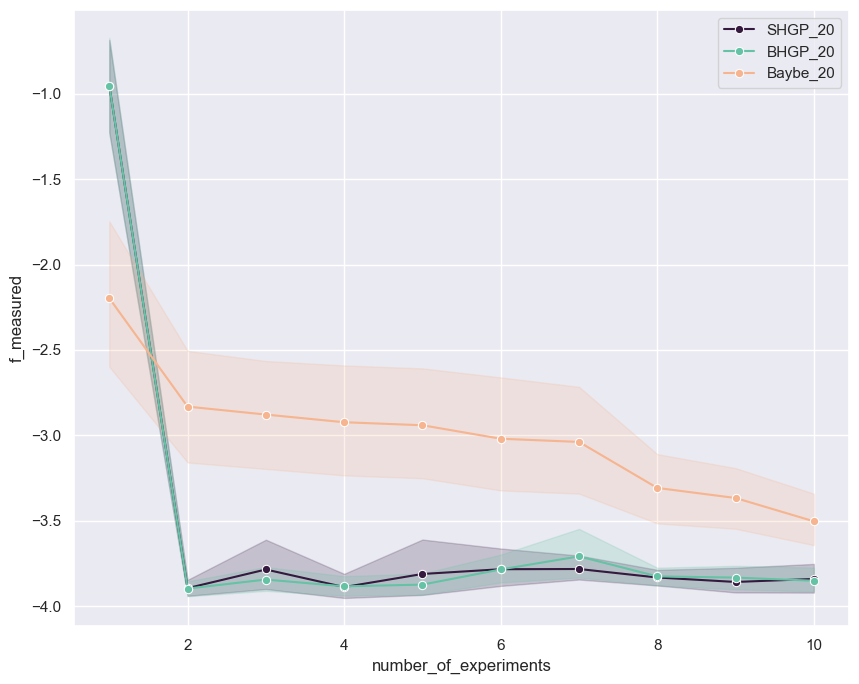

In [492]:
### Plot 2a) ###

plt.figure(figsize=(10, 8))
palette_1 = sns.color_palette("rocket")
palette_2 = sns.color_palette("Set2")
palette_3 = sns.color_palette("rocket_r")

# data = create_dataframes({k : v.flatten() for k,v in paded_dict.items() if any(s in k for s in ['HGP']) and 
#                   not k.startswith(('S', 'B', 'M'))})
data_0 = create_dataframes({k : v.flatten() for k,v in paded_dict.items() if any(s in k for s in ['SHGP_60'])})
data_1 = create_dataframes({k : v.flatten() for k,v in paded_dict.items() if any(s in k for s in ['BHGP_60'])})
sns.lineplot(data=data_0, x="number_of_experiments", y="f_measured", hue="percentage_data_used", marker='o',
             palette=palette_1, label='SHGP_20', legend=False)
sns.lineplot(data=data_1, x="number_of_experiments", y="f_measured", hue="percentage_data_used", marker='o',
             palette=palette_2, label='BHGP_20', legend=False)
sns.lineplot(data=baybe_df[baybe_df['num_clusters']=='20'], x="number_of_experiments", y="f_measured", 
             hue="num_clusters", marker='o', palette=palette_3, label='Baybe_20', legend=False)
plt.legend(loc='best')
plt.show()

In [493]:
plt.figure(figsize=(10, 8))
    
sns.lineplot(data=, x="number_of_experiments", y="f_measured", hue="num_clusters", 
             marker='o', palette=sns.color_palette("rocket"))

plt.legend(loc='best')

plt.show()

NameError: name 'baybe_h6' is not defined

<Figure size 1000x800 with 0 Axes>

In [494]:
filesfile_a = './results_dict_all_models_.pkl'
with open(file_a, 'rb') as file:
    loaded_array_a = pickle.load(file)

In [495]:
loaded_array_a

{'GPBO_f_observed': array([[[-2.37474585e+00],
         [-1.01734939e+00],
         [-2.27028559e+00],
         [-1.32750419e+00],
         [-2.58537039e+00],
         [-2.00954136e+00],
         [-4.75087767e-01],
         [-1.87000429e+00],
         [-3.89902683e+00],
         [-3.18401290e+00]],
 
        [[-8.04470035e-01],
         [-2.17712693e+00],
         [-1.60110384e+00],
         [-2.51829199e+00],
         [-2.51181861e+00],
         [-2.71153285e+00],
         [-2.58958697e+00],
         [-1.88917426e+00],
         [-3.32944208e-01],
         [-2.60814769e+00]],
 
        [[-8.98914264e-01],
         [-3.93285718e-01],
         [-7.15281636e-01],
         [-6.55062533e-01],
         [-6.42115334e-01],
         [-8.19905863e-01],
         [-5.81983981e-01],
         [-4.94258336e-01],
         [-2.69466905e-01],
         [-7.84174482e-01]],
 
        [[-1.25005811e+00],
         [-2.61278293e-01],
         [-9.98922735e-01],
         [-1.26229335e+00],
         [-1.6579921